In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#Load dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [68]:
#Shows row and columns
df.shape

(3999, 12)

In [69]:
#Shows data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [70]:
#checking missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

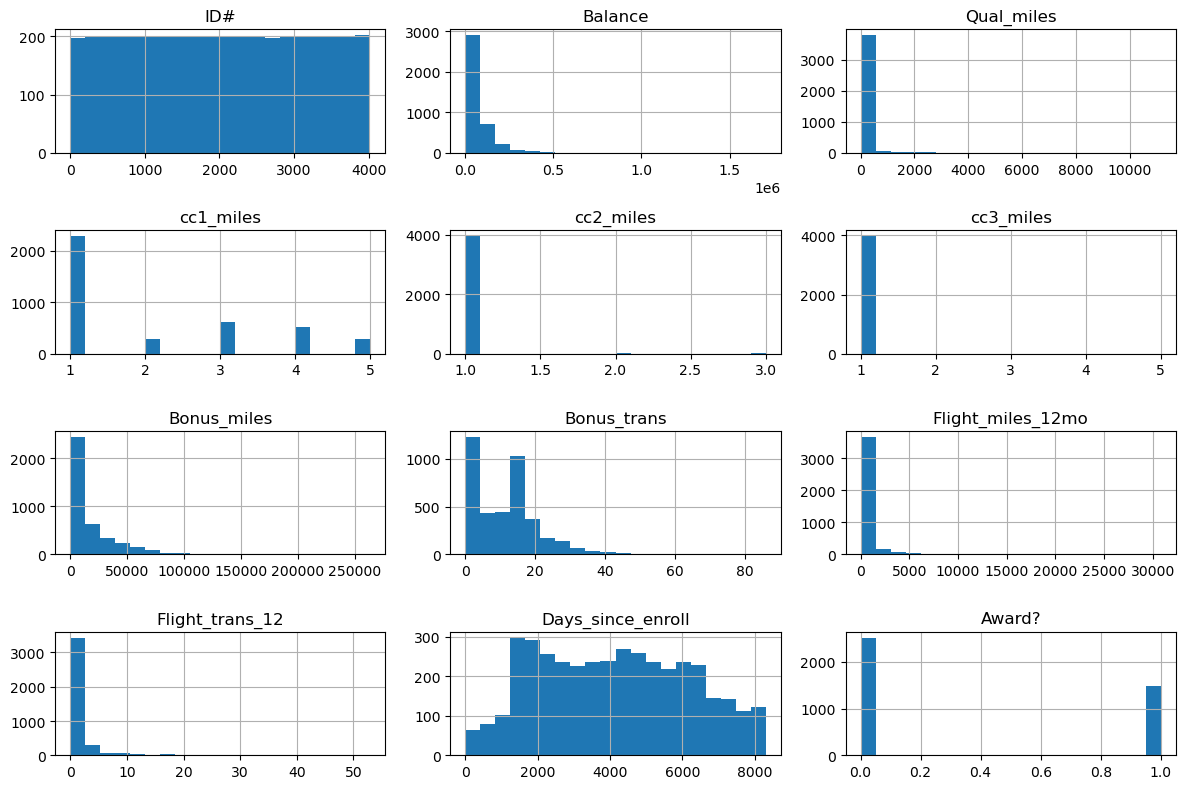

In [71]:
#Histogram
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

In [72]:
# Drop ID column
X = df.drop(columns=['ID#'])


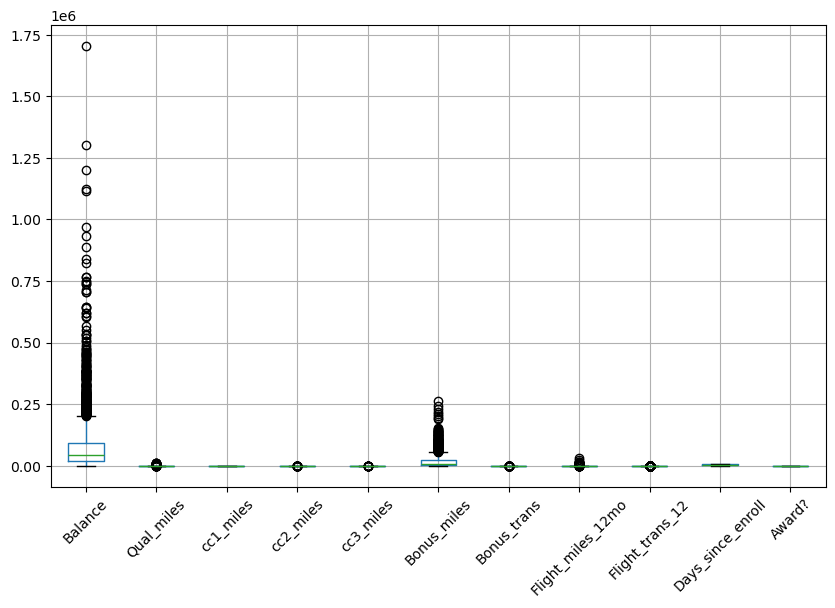

In [73]:
#Boxplot (Outliers Detection)
plt.figure(figsize=(10,6))
X.boxplot()
plt.xticks(rotation=45)
plt.show()

In [74]:
#Outlier Treatment (IQR Capping)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

X = X.clip(lower=lower, upper=upper, axis=1)

In [75]:
#Scaling on dateset
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
#Elbow Method (Choosing K)
from sklearn.cluster import KMeans

inertia = []

K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
print(inertia)

[22258.71433857883, 17645.5446599622, 15198.314190417525, 13694.938371769393, 12408.144196725952, 11413.77011974937, 10731.205609808094, 10033.845557812256, 9526.021854905059]


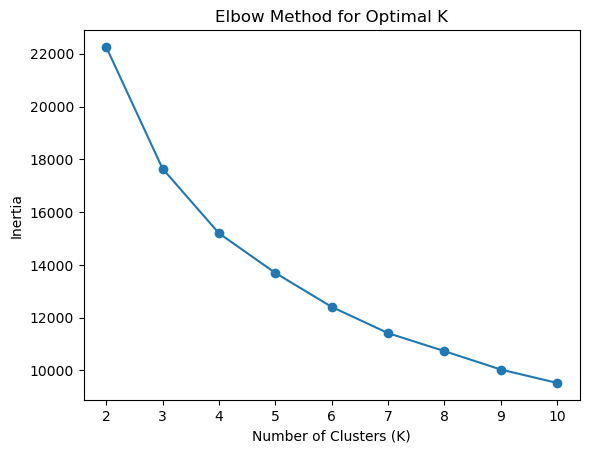

In [77]:
# by plotting elbow method we can decide which k is best
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [78]:
#Apply PCA on original dataset
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(X_scaled)
X_pc = pd.DataFrame(pc)
X_pc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.737947,-0.190415,1.697070,0.136010,-0.473329,-0.319692,0.053114,-0.007829,-2.531665e-17,2.091383e-16,2.666562e-16
1,-1.747590,-0.195937,1.617487,0.203543,-0.618212,-0.262592,0.058054,-0.007608,-8.439987e-18,1.885775e-16,2.880062e-16
2,-1.418350,-0.311377,1.663518,-0.005010,-0.461462,-0.101489,0.199781,-0.002742,7.544133e-18,3.173920e-16,-3.001626e-16
3,-1.814796,-0.182490,1.610746,0.247898,-0.628558,-0.367882,0.073545,-0.005470,-3.600005e-17,2.110598e-16,2.125247e-16
4,4.070917,1.145215,0.351637,0.523487,-0.832466,-0.225732,-0.019933,0.001055,-6.944329e-17,-3.197316e-16,-3.292460e-17


In [79]:
#PCA variance
X_pc.var()

0     3.470991e+00
1     1.706360e+00
2     9.450583e-01
3     8.258371e-01
4     5.248411e-01
5     3.924467e-01
6     7.944370e-02
7     5.702326e-02
8     1.251265e-31
9     1.090685e-31
10    1.378665e-30
dtype: float64

In [80]:
#Take only first 3 columns(others are zero variance)
X_new = X_pc.iloc[:,0:3]
X_new.head()

,0,1,2
0,-1.737947,-0.190415,1.697070
1,-1.747590,-0.195937,1.617487
2,-1.418350,-0.311377,1.663518
3,-1.814796,-0.182490,1.610746
4,4.070917,1.145215,0.351637


In [87]:
#apply KMeans Clusering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_new)

df['KMeans_Cluster'] = kmeans_labels
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [88]:
#silhouette_score
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_silhouette

np.float64(0.30746978838003775)

In [89]:
#DBSCAN Model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=20)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels
df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    2430
 1    1417
-1     152
Name: count, dtype: int64

In [90]:
# Remove noise points
df_new = df[df["DBSCAN_Cluster"] != -1]
df_new.shape


(3847, 14)

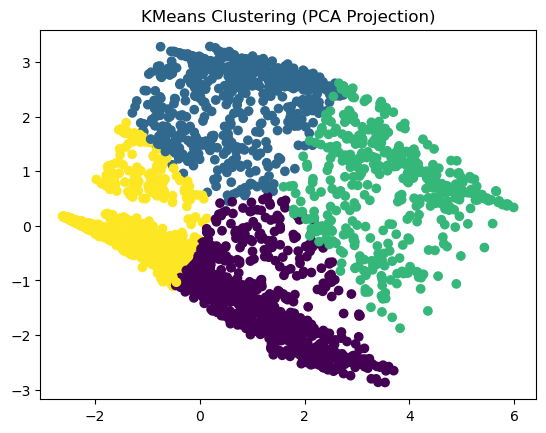

In [91]:
#Visualization (2D Projection using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans plot
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title("KMeans Clustering (PCA Projection)")
plt.show()


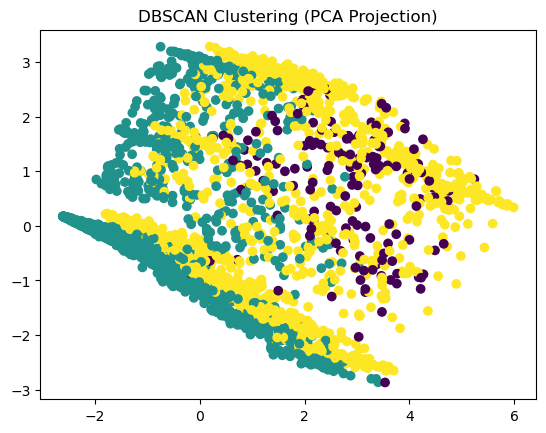

In [92]:
# DBSCAN plot
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.show()


In [ ]:
K-Means Clustering – Insights:

   *Identified clear and well-separated customer segments
   *One cluster represents low-engagement customers with low flight and bonus activity
   *One cluster contains frequent flyers with high flight miles and transactions
   *Another cluster includes bonus/credit-card–driven customers with high bonus miles   
   *Final cluster represents long-term loyal customers with award redemptions

In [ ]:
DBSCAN Clustering – Insights:

   *Formed dense clusters based on customer similarity
   *Identified outliers as noise (unusual customer behavior)
   *Useful for anomaly detection but less interpretable than K-Means

In [ ]:
Clustering Quality Evaluation (Silhouette Score Comparison)

K-Means:
      The silhouette score for K-Means is moderately high, indicating good cluster separation and compactness. 
      This shows that customers within the same cluster are similar, and clusters are reasonably well separated, making K-Means effective for customer
segmentation.

DBSCAN:
      The silhouette score for DBSCAN is comparatively lower (after excluding noise points), indicating weaker cluster separation.
      However, DBSCAN effectively identifies outliers, which reduces overall compactness.

Comparison:
      Overall, K-Means achieves better clustering quality, while DBSCAN provides added value through noise and anomaly detection.